# **Clustering Antarctic Penguin Species**

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- `culmen_length_mm`: culmen length (mm)
- `culmen_depth_mm`: culmen depth (mm)
- `flipper_length_mm`: flipper length (mm)
- `body_mass_g`: body mass (g)
- `sex`: penguin sex

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/17_Clustering_Antarctic_Penguin_Species/penguins.csv"

In [3]:
df = pd.read_csv(url)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.shape

(344, 5)

In [5]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [6]:
df = df[df['sex'].isin(['MALE', 'FEMALE'])]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   sex                334 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [8]:
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

```python
from sklearn.impute import SimpleImputer

# Handle missing values
# Numerical columns
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df['sex'] = imputer_cat.fit_transform(df[['sex']])
```

In [9]:
# Remove outliers based on flipper_length_mm
df = df[(df['flipper_length_mm'] < 400) & (df['flipper_length_mm'] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


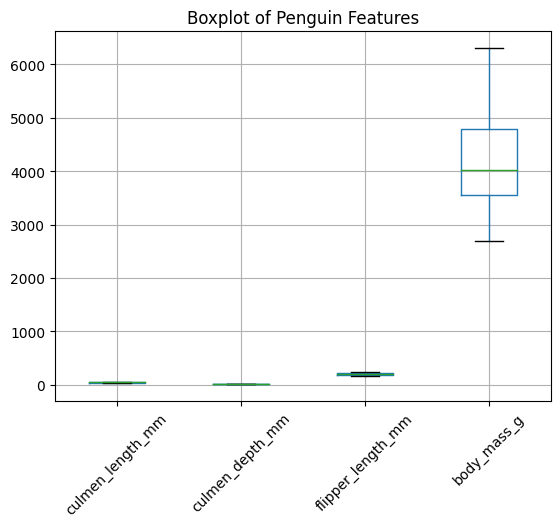

In [10]:
#  Data Befor preprocessing and feature Scaling

features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[features].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Penguin Features')
plt.show()

In [11]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


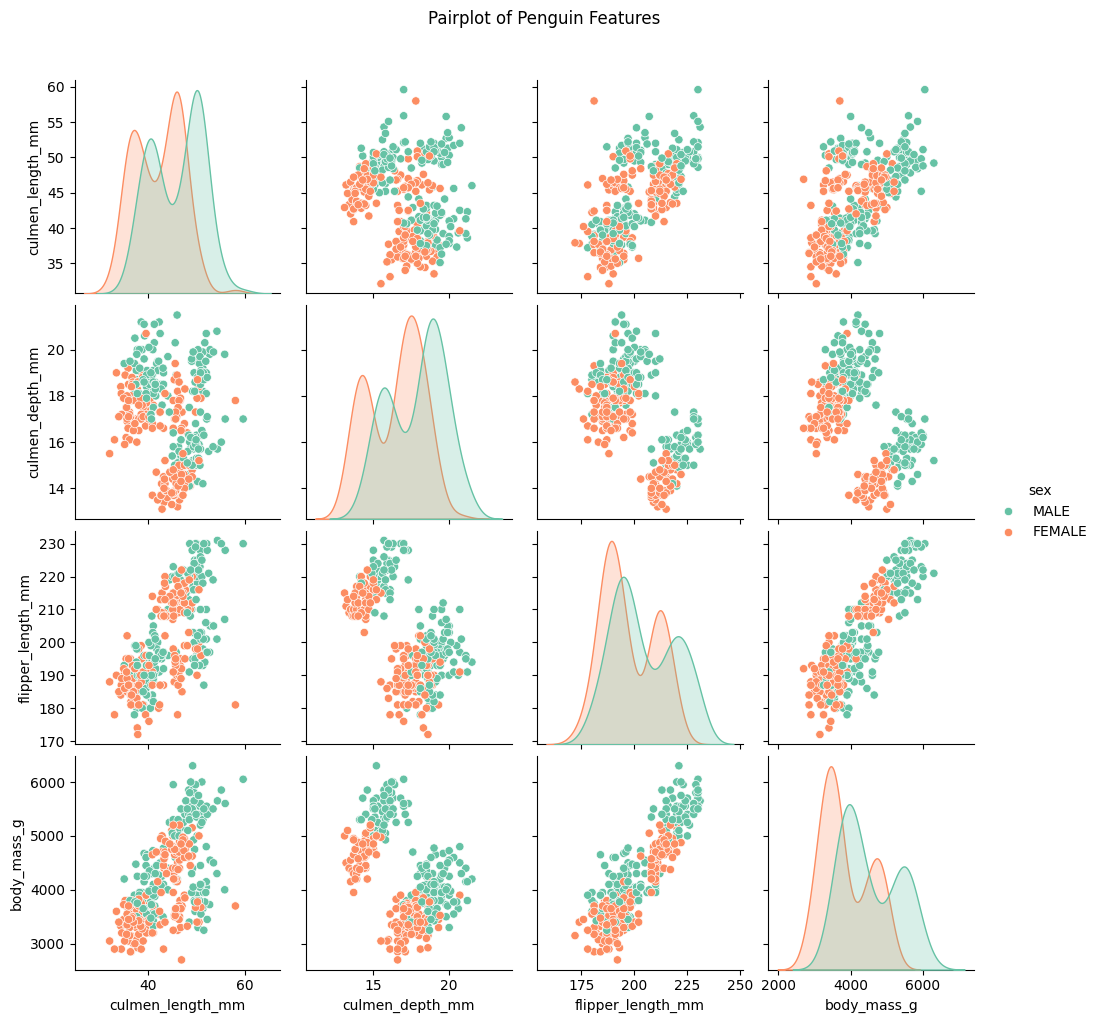

In [12]:
# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Create the pairplot
pairplot = sns.pairplot(df, hue='sex', palette=custom_palette)

# Add a title to the entire figure
plt.suptitle('Pairplot of Penguin Features', y=1.02)

# Adjusting the layout for better aesthetics
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()

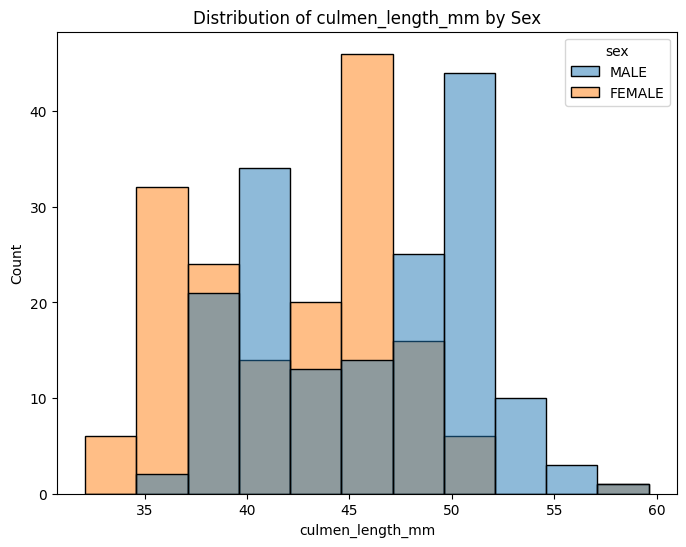

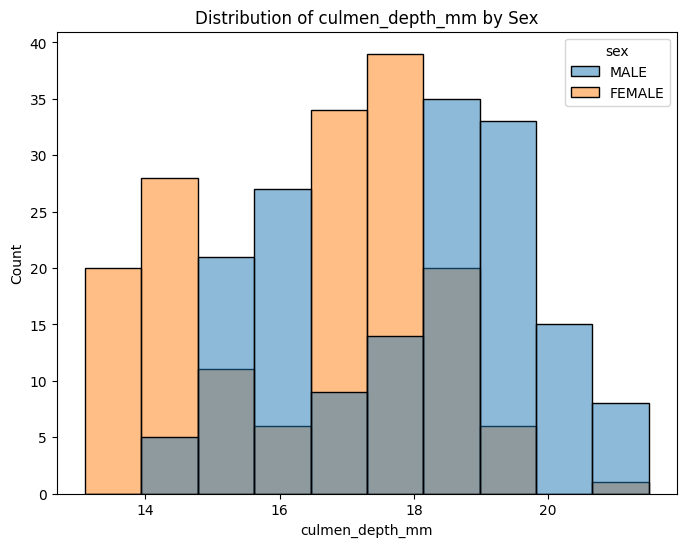

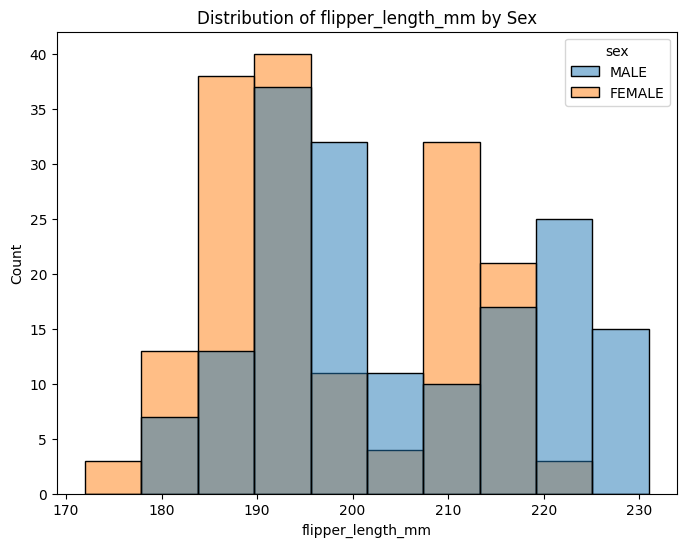

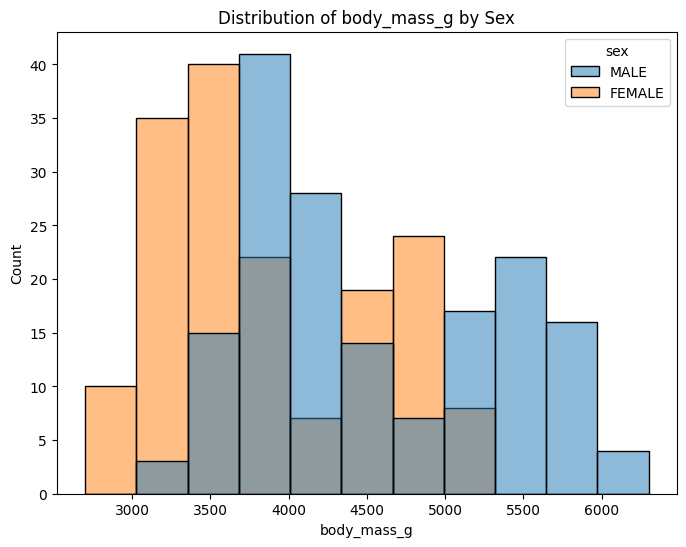

In [13]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=False, hue='sex')
    plt.title(f'Distribution of {feature} by Sex')
    plt.show()
    print("\n")

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
6,38.9,17.8,181.0,3625.0,0
7,39.2,19.6,195.0,4675.0,1
12,41.1,17.6,182.0,3200.0,0
13,38.6,21.2,191.0,3800.0,1
15,36.6,17.8,185.0,3700.0,0


In [15]:
# Numerical columns
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Perform preprocessing steps on the dataset - Feature scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,1
1,-0.830434,0.126187,-1.068577,-0.504847,0
2,-0.683490,0.432728,-0.426399,-1.187953,0
4,-1.344738,1.096901,-0.569105,-0.939551,0
5,-0.867170,1.761074,-0.783164,-0.691149,1


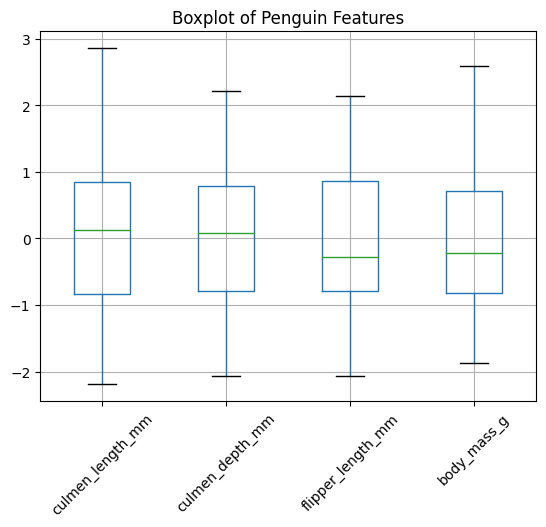

In [16]:
# Data After preprocessing and feature Scaling
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[features].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Penguin Features')
plt.show()

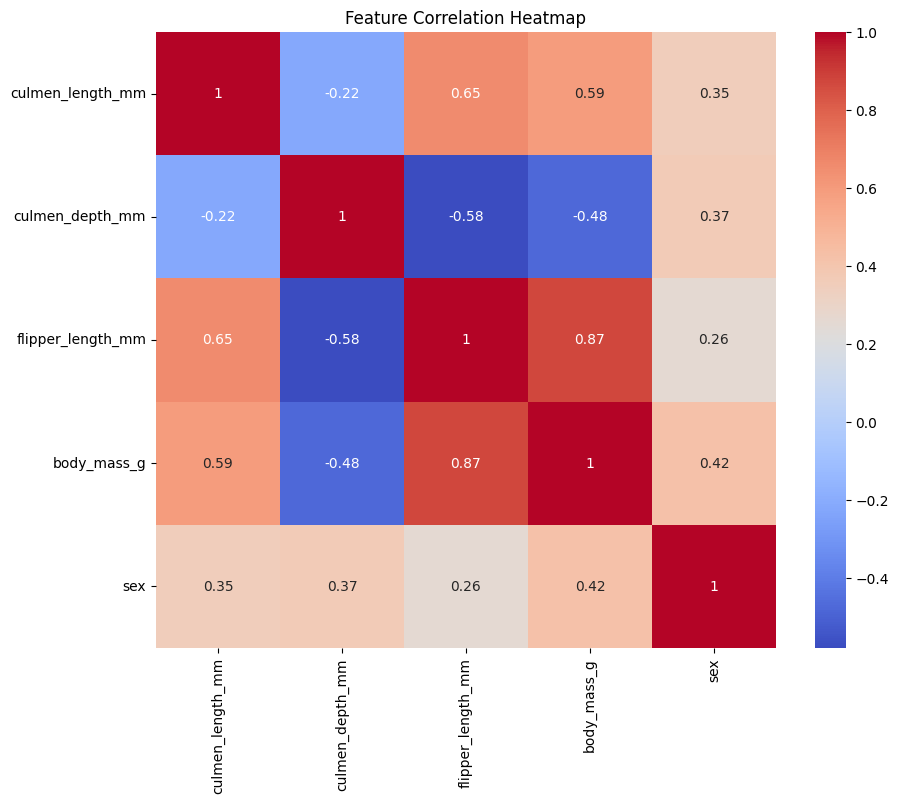

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## **Logistic Regression Model**

In [18]:
# Split into feature and target sets
X = df.drop(columns='sex')
y = df['sex']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate the model
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1}")

F1-score: 0.8957553370272383


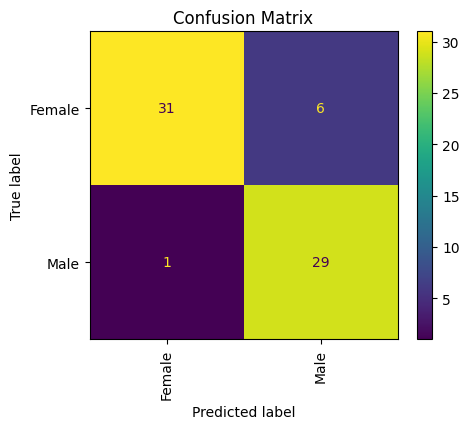

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Female', 'Male'])

# Customize the plot
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(cmap='viridis', ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

      Female       0.97      0.84      0.90        37
        Male       0.83      0.97      0.89        30

    accuracy                           0.90        67
   macro avg       0.90      0.90      0.90        67
weighted avg       0.91      0.90      0.90        67



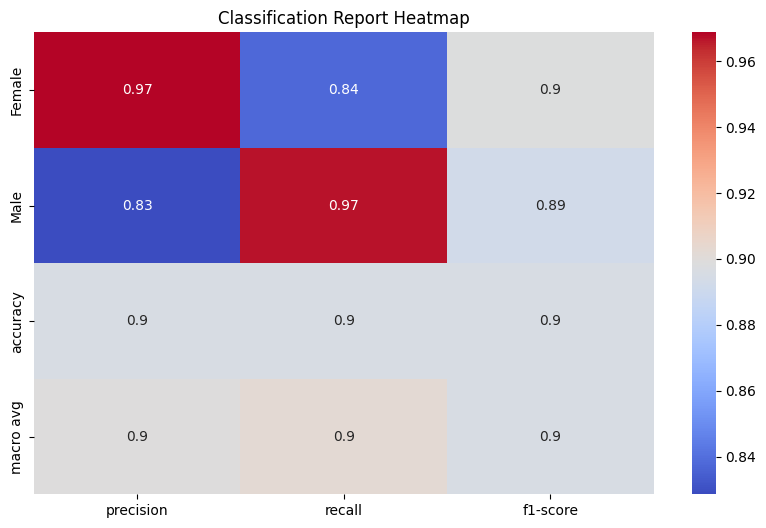

In [20]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Female', 'Male'])
print(report)

# Convert the classification report to a dictionary
report_dict = metrics.classification_report(y_test, y_pred, target_names=['Female', 'Male'], output_dict=True)

# Convert to DataFrame for better visualization
report_df = pd.DataFrame(report_dict).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()

## **Clustering and PCA Analysis**

In [21]:
# Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(X)
explained_variance = dfx_pca.explained_variance_ratio_
print(explained_variance)

n_components = sum(explained_variance > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(X)

[0.68713344 0.19641564 0.08951723 0.0269337 ]


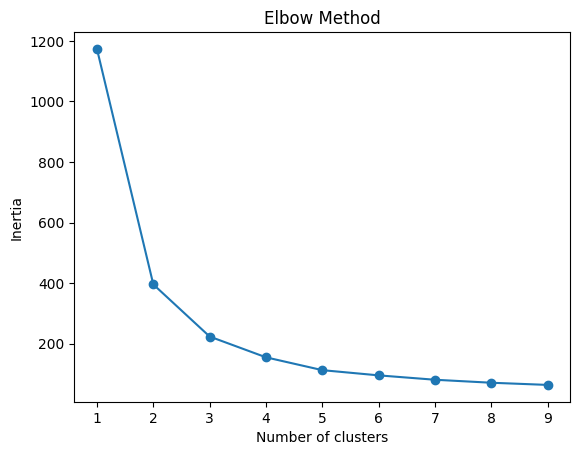

In [22]:
# Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

n_clusters = 4

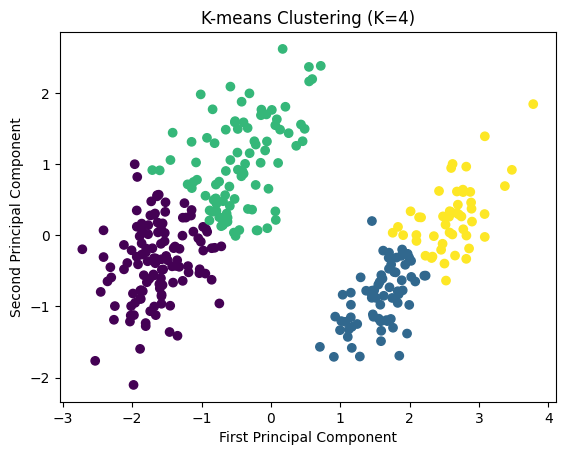

In [23]:
# Run the k-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()


In [24]:
# Create a final statistical DataFrame for each cluster
df['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'label']
stat_penguins = df[numeric_columns].groupby('label').mean()
print(stat_penguins)


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             -1.044626         0.412039          -0.931767    -0.841268
1              0.291613        -1.388750           0.882774     0.685413
2              0.531196         0.883100          -0.275162    -0.316858
3              1.148170        -0.705562           1.542945     1.673019


F1-score (Random Forest): 0.9106876332622601


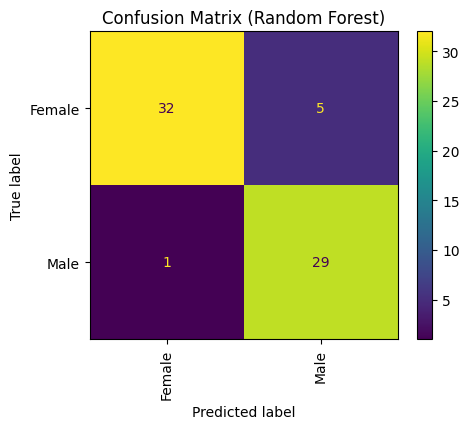

              precision    recall  f1-score   support

      Female       0.97      0.86      0.91        37
        Male       0.85      0.97      0.91        30

    accuracy                           0.91        67
   macro avg       0.91      0.92      0.91        67
weighted avg       0.92      0.91      0.91        67



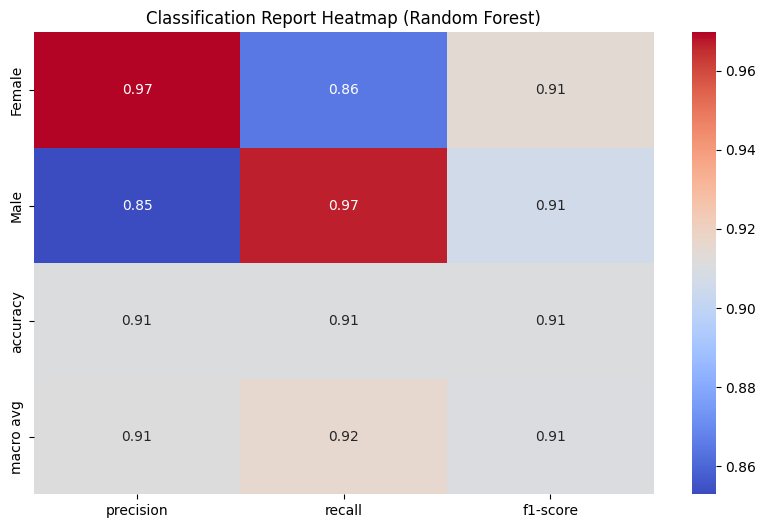

In [25]:
# Train a Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the Random Forest model
f1_rf = metrics.f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1-score (Random Forest): {f1_rf}")

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Female', 'Male'])

# Customize the plot
fig, ax = plt.subplots(figsize=(5, 4))
disp_rf.plot(cmap='viridis', ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf, target_names=['Female', 'Male'])
print(report_rf)

# Convert the classification report to a dictionary
report_dict_rf = metrics.classification_report(y_test, y_pred_rf, target_names=['Female', 'Male'], output_dict=True)

# Convert to DataFrame for better visualization
report_df_rf = pd.DataFrame(report_dict_rf).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_rf.iloc[:-1, :-1], annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap (Random Forest)')
plt.show()